## Goal:
* Discover drivers of churn within the Telco dataset
* Use these drivers to develop a machine learning model to predict whether or not a customer will churn

#### Imports

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# acquire
import wrangle as w
import env
import explore

# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

## Acquire
* Data acquired from Codeup Database
* It contained 7043 rows and 24 columns before cleaning
* Each row represents a customer from the Telco company
* Each column represents a feature of those customers

## Prepare
### Prepare Actions:

* Dropped duplicate columns
* Removed columns that did not contain useful information
* Renamed columns to promote readability
* Checked for nulls in the data (there were none)
* Dropped Null Values stored as whitespace
* Checked that column data types were appropriate, converted total charges to the correct data type
* Encoded categorical variables
* Split data into train, validate and test (approx. 75/12.5/12.5), stratifying on 'churn'
* Outliers have not been removed for this iteration of the project

In [2]:
# acquiring telco data from codeup database
df = w.get_telco_data()

#Preparing telco data for exploration
df = w.prep_telco(df)

#Split data and set target variable
target = 'churn'
train, validate, test = w.train_validate_test_split(df, target)

## A brief look at the data

In [3]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,1,0,0,0,1,0,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,0,1,0,0,1,0,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,0,0,1,0,1,0,1,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,1,0,0,1,0,0


## Summary of the data

In [4]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.163145,32.549573,64.640583,2279.278230,0.495530,0.491670,0.301910,0.903088,0.590207,0.265949,...,0.546323,0.208046,0.245632,0.341325,0.438643,0.220033,0.215766,0.224096,0.335636,0.224502
std,0.369536,24.563833,30.096846,2254.640564,0.500031,0.499981,0.459133,0.295868,0.491845,0.441882,...,0.497900,0.405951,0.430505,0.474202,0.496271,0.414310,0.411394,0.417028,0.472260,0.417296
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.150000,400.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.300000,1398.975000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,89.850000,3810.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploration

## What is the percentage of customers who churn?

In [5]:
#Target variable value counts
train.churn.value_counts()

0    3613
1    1309
Name: churn, dtype: int64

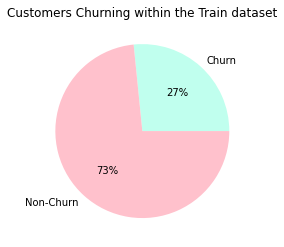

In [6]:
w.get_pie_churn(train)

* **Approximately 27 percent of customers in this dataset "churned" (left the company)**

In [7]:
num_vars = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']
cat_vars = ['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', \
            'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing','contract_type','internet_service_type', \
            'payment_type']

In [ ]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

In [ ]:
# Visualize float columns
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [ ]:
#Visualize other numeric data
# Plot numeric columns
for col in num_vars:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

### Bivariate Analysis

In [ ]:
def cat_vis(train, col):
    plt.title('Relationship of churn rate and '+col)
    sns.barplot(x=col, y='churn', data=train)
    survival_rate = train.churn.mean()
    plt.axhline(survival_rate, label='churn rate')
    plt.legend()
    plt.show()

In [ ]:
def cat_test(train, col):
    alpha = 0.05
    null_hyp = col+' and churn rate are independent'
    alt_hyp = 'There is a relationship between churn rate and '+col
    observed = pd.crosstab(train.churn, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between survival rate and '+col)

In [ ]:
for col in cat_vars:
    cat_vis(train, col)
    cat_test(train, col)

In [ ]:
#Looking at relationship between gender and churn

plt.title("Gender and churn, Female = 1")
sns.barplot(x="gender_encoded", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### 1. Gender_Encoded (female ==1) vs. Churn:

Hypotheses:

H^0: The churn rate of women is less than or equal to the chrn rate of men.

H^a: The churn rate of women is greater than the churn rate of men

In [ ]:
# Chi-Square test to compare two categorical variables (Gender and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of women is less than or equal to the chrn rate of men."
alternative_hypothesis = "The churn rate of women is greater than the churn rate of men."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['gender_encoded'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

#### Conclusion for gender: not a significant difference for churn rate

## Is there a relationship between being a Senior Citizen and Churn rate?

In [ ]:
#Create bar chart (senior_citizen)
w.get_bar_senior(train)

### Senior Citizen vs. Churn:

* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: **The churn rate of senior citizens is less than or equal to the churn rate of non-senior citizens.**

$H_a$: **The churn rate of senior citizens is greater than the churn rate of non-senior citizens.**

In [ ]:
#Get chi-square test results
w.get_chi_senior(train)

**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that "Senior Citizen" and "Churn" are related. I believe that including this feature in modeling will likely have a positive impact on model accuracy.**

## Does a customer having a partner affect churn?

In [ ]:
#Visualizing relationship between partner status and churn
w.get_bar_partner(train)

#### It appears that those with partners churn less than those without.

### Partner Status vs. Churn: Looking at the significance of the relationship

* Both variables are categorical so a Chi-Squared test is required
* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: **The churn rate of partnered customers is greater than or equal to the churn rate of single customers.**

$H_a$: **The churn rate of partnered customers is less than the churn rate of single customers.**

In [ ]:
def get_chi_partner(train):
    '''gets results of chi-square test for partner status and churn'''
    observed = pd.crosstab(train.churn, train['partner_encoded'])

    chi2, p, degf, expected = stats.chi2_contingency(observed)

    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')

In [ ]:
w.get_chi_partner(train)

**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that a customer having a partner and churn are related. However, this feature is similar to having dependents, and may not add value when included in modeling.**

In [ ]:
# Chi-Square test to compare two categorical variables (Partner and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of partnered customers is greater than or equal to the churn rate of single customers."
alternative_hypothesis = "The churn rate of partnered customers is less than the churn rate of single customers."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['partner_encoded'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

### Conclusion for partner status: significant relationship

## Does a customer having dependents affect churn?

In [ ]:
w.get_bar_dependents(train)

### It appears that customers with dependents churn less than those without dependents.

### Dependents vs. Churn: Testing Significance of Relationship

* Both variables are categorical so a Chi-Squared test is required
* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: **The churn rate of those with dependents is greater than or equal to those without dependents.**

$H_a$: **The churn rate of those with dependents is less than those without dependents.**

In [ ]:
#Run chi-square test on dependents vs churn
w.get_chi_dependents(train)

**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that a customer having dependents is related to churn rate. I believe that including this feature in modeling will likely have a positive impact on model accuracy.**

## Does customer contract type affect churn?

In [ ]:
w.get_bar_contract(train)

#### It appears that customers with month-to-month contracts churn at a much higher rate than those with two-year contracts. Customers with one-year contracts churn less than month-to-month, but more than two-year contact customers.

### Contract Type vs. Churn: Testing Significance of Relationship

* Both variables are categorical so a Chi-Squared test is required
* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: The churn rate of those on a month-to-month contract is less than or equal to other customers.

$H_a$: The churn rate of those on a month-to-month contract is greater than other customers.

In [ ]:
#Running chi-squared test comparing contract type and churn
w.get_chi_contract(train)

**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that customer contract type is related to churn rate. I believe that including this feature in modeling will likely have a strong positive impact on model accuracy.**

## Examining Numeric variables vs discrete (Churn)

In [ ]:
train.head()

In [ ]:
num_vars

In [ ]:
sns.relplot(data=train, x='monthly_charges', y='tenure', kind='scatter', hue='churn', col='churn')

In [ ]:
sns.swarmplot(data=train, x='churn', y='tenure', hue='churn')

### Looking at tenure vs. churn rate

In [ ]:
# Subset the data into churn and not-churned status
not_churned = train[train.churn == 0]
churned = train[train.churn == 1]

In [ ]:
plt.title("What's the relationship of tenure and churn rate?")
plt.hist(not_churned.tenure, label="not churned")
plt.hist(churned.tenure, label="churned")
plt.legend()
plt.show()

#### It appears that customers with a longer tenure churn less

#### Establish Hypotheses:

$H_0$ : null_hypothesis = Customers with a higher mean tenure have a churn rate greater than or equal to those with a shorter tenure.

$H_a$: alternative_hypothesis = Customers with a higher mean tenure churn less than those with shorter tenure.

In [ ]:
# check variances of the two groups
not_churned.tenure.var(), churned.tenure.var()

In [ ]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.tenure, churned.tenure)
pval
# pval is significant so we can conclude variances are NOT equal

In [ ]:
# Two-sample T-test to compare a continuous variable (tenure) with a categorical variable (churn)
alpha = 0.05
null_hypothesis = "Customers with a higher tenure have a churn rate greater than or equal to those with a shorter tenure."
alternative_hypothesis = "Customers with a higher tenure have a lower churn rate than those with shorter tenure."

# Setup test
t, p = stats.ttest_ind(not_churned.tenure, churned.tenure, equal_var=False)
t, p

In [ ]:
if (p/2 < alpha) & (t > 0):
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")

### Conclusion: Customers with a longer tenure (in months) have a lower churn rate than customers with lower tenures

## Does a customer's monthly charge amount impact churn?

In [5]:
# Subset the data into churn and not-churned status
not_churned = train[train.churn == 0]
churned = train[train.churn == 1]

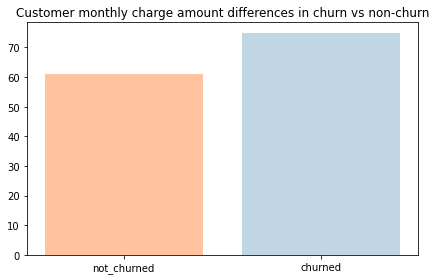

In [6]:
#Get viz of monthly charge vs churn
w.monthly_charges_md(train)

#### It appears that customers who have lower monthly charges churn less.

### Monthly Charges vs. Churn: Testing Significance of Relationship

* Monthly Charges is a continuous variable, and both populations are independent, so an independent T-Test is required.
* I used a 95% confidence interval (alpha value .05)
* Variances were tested and not equal, and indicated in testing parameter

Hypotheses:

$H_0$: **Customers with lower monthly charges have a churn rate greater than or equal to those with higher charges.**

$H_a$: **Customers with lower monthly charges have a lower churn rate than those with higher monthly charges.**

In [ ]:
# check variances of the two groups
not_churned.monthly_charges.var(), churned.monthly_charges.var()

In [ ]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.monthly_charges, churned.monthly_charges)
pval
# pval is significant so we can conclude variances are NOT equal

In [ ]:
def get_t_monthly(train):
    "get t-test for monthly charges and churn"
    #Seperate samples into churn and not churn
    not_churned = train[train.churn == 0]
    churned = train[train.churn == 1]
    #Run t-test on these groups, variances are not equal
    t, p = stats.ttest_ind(not_churned.monthly_charges, churned.monthly_charges, equal_var=False)

    print(f't = {t:.4f}')
    print(f'p = {p:.4f}') 

In [ ]:
#Run T-test comparing monthly charges and churn status
w.get_t_monthly(train)

**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that customer monthly charge amount is related to churn rate. I believe that including this feature in modeling will likely have a positive impact on model accuracy.**

## Does the total charges a customer has accrued impact churn rate?

In [ ]:
plt.title("What's the relationship of customer total charges and churn?")
plt.hist(not_churned.total_charges, label="not churned")
plt.hist(churned.total_charges, label="churned")
plt.legend()
plt.show()

In [ ]:
sns.boxplot(x='total_charges', data=train)

In [ ]:
def total_charges_md(train):
    # Subset the data into churn and not-churned status
    not_churned = train[train.churn == 0]
    churned = train[train.churn == 1]
    #assign values and labels
    values = [not_churned.total_charges.mean(), churned.total_charges.mean()]
    labels = ['not_churned', 'churned']
    # generate and display chart
    plt.bar(height=values, x=labels, color=['#ffc3a0', '#c0d6e4'])
    plt.title('Customer mean total charge differences (churn vs non-churn)')
    plt.tight_layout()
    plt.show()

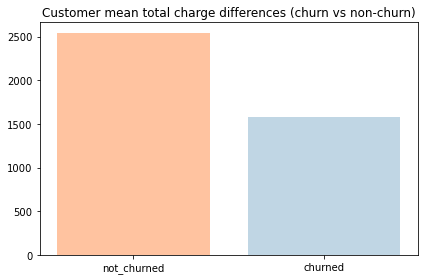

In [7]:
#Get bar chart comparing total charges with churn
w.total_charges_md(train)

### Total Charges vs. Churn: Testing Significance of Relationship

* Total Charges is a continuous variable, and both populations are independent, so an independent T-Test is required.
* I used a 95% confidence interval (alpha value .05)
* Variances were tested and not equal, and indicated in testing parameter

Hypotheses:

$H_0$: Customers with higher total charges have a churn rate greater than or equal to those with lower total charges

$H_a$: Customers with higher total charges have a lower churn rate than those with lower total charges

In [8]:
def get_t_total(train):
    '''get t-test for total charges and churn"'''
    #Seperate samples into churn and not churn
    not_churned = train[train.churn == 0]
    churned = train[train.churn == 1]
    #Run t-test on these groups, variances are not equal
    t, p = stats.ttest_ind(not_churned.total_charges, churned.total_charges, equal_var=False)
    #format results
    print(f't = {t:.4f}')
    print(f'p = {p:.4f}') 

In [9]:
#Run t-test comparing total charges and churn
w.get_t_total(train)

t = 14.6932
p = 0.0000


$H_0$ : null_hypothesis = "Customers with higher total charges have a mean churn rate greater than or equal to those with lower total charges."

$H_a$: alternative_hypothesis = "Customers with higher total charges have a lower mean churn rate than those with lower total charges."

#### It appears that the mean total charges for customers who churned is higher than those who did not churn

In [ ]:
# check variances of the two groups
not_churned.total_charges.var(), churned.total_charges.var()

In [ ]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.total_charges, churned.total_charges)
pval
# pval is significant so we can conclude variances are NOT equal

In [ ]:
# Two-sample T-test to compare a continuous variable (monthly charges) with a categorical variable (churn)
alpha = 0.05
null_hypothesis = "Customers with higher total charges have a mean churn rate greater than or equal to those with lower total charges."
alternative_hypothesis = "Customers with higher total charges have a lower mean churn rate than those with lower total charges."

# Setup test
t, p = stats.ttest_ind(not_churned.total_charges, churned.total_charges, equal_var=False)
t, p

In [ ]:
if (p/2 < alpha):
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")

## Exploration Summary

In [ ]:
#Baseline accuracy
(y_train == 0).mean()

In [ ]:
#Find Baseline
y_train.value_counts()
#Baseline is 0, customer did not churn

# Modeling
* I will use accuracy as my evaluation metric
* non-churned customers makeup 73% of the data
* by guessing non-churn for every customer, one could achieve an accuracy of 73%
* 73% will be the baseline accuracy I use for this project
* I will be evaluating models developed using four different model types and various hyperparameter configurations
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test data

### Modeling

In [11]:
#preparing data for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test = w.model_prep(train, validate, test)

In [9]:
X_train.head()

,senior_citizen,dependents_encoded,monthly_charges,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,0,0,95.70,1,0,0
1,0,0,70.20,1,0,0
2,0,1,20.35,0,0,1
3,0,1,109.00,0,0,1
4,0,1,96.95,1,0,0


In [11]:
X_train.shape
X_validate.shape
#_test.shape

(1055, 6)

In [ ]:
#Find Baseline
y_train.value_counts()
#Baseline is 0, customer did not churn

In [ ]:
#Baseline Accuracy
(y_train == 0).mean()

### Decision Tree

In [10]:
def get_tree(X_train, X_validate, y_train, y_validate):
    '''get decision tree accuracy on train and validate data'''

    # create classifier object
    clf = DecisionTreeClassifier(max_depth=3, random_state=123)

    #fit model on training data
    clf = clf.fit(X_train, y_train)

    # print result
    print(f"Accuracy of Decision Tree on train data is {clf.score(X_train, y_train)}")
    print(f"Accuracy of Decision Tree on validate data is {clf.score(X_validate, y_validate)}")

In [12]:
#Run decision tree on train and validate data
w.get_tree(X_train, X_validate, y_train, y_validate)

Accuracy of Decision Tree on train data is 0.7561966680211296
Accuracy of Decision Tree on validate data is 0.7545023696682465


In [12]:
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

In [13]:
# model.fit(X, y)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [14]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- contract_type_Month-to-month <= 0.50
|   |--- monthly_charges <= 95.22
|   |   |--- contract_type_Two year <= 0.50
|   |   |   |--- class: 0
|   |   |--- contract_type_Two year >  0.50
|   |   |   |--- class: 0
|   |--- monthly_charges >  95.22
|   |   |--- contract_type_One year <= 0.50
|   |   |   |--- class: 0
|   |   |--- contract_type_One year >  0.50
|   |   |   |--- class: 0
|--- contract_type_Month-to-month >  0.50
|   |--- monthly_charges <= 69.22
|   |   |--- monthly_charges <= 20.93
|   |   |   |--- class: 0
|   |   |--- monthly_charges >  20.93
|   |   |   |--- class: 0
|   |--- monthly_charges >  69.22
|   |   |--- monthly_charges <= 107.42
|   |   |   |--- class: 1
|   |   |--- monthly_charges >  107.42
|   |   |   |--- class: 0



In [15]:
#Use your model to make predictions on the in-sample data
tree.predict(X_train)

array([1, 1, 0, ..., 0, 1, 1])

In [16]:
y_pred = tree.predict(X_train)
actual = y_train

In [17]:
y_pred.shape

(4922,)

In [18]:
#Baseline accuracy
(y_train == 0).mean()

churn    0.734051
dtype: float64

In [19]:
y_pred_proba = tree.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.46359385, 0.53640615],
       [0.46359385, 0.53640615],
       [0.98540146, 0.01459854],
       [0.916     , 0.084     ],
       [0.46359385, 0.53640615]])

### Evaluating in-sample results using the model score, confusion matrix, and classification report.

In [20]:
confusion_matrix(actual, y_pred)

array([[2919,  694],
       [ 506,  803]])

In [21]:
print(classification_report(actual, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3613
           1       0.54      0.61      0.57      1309

    accuracy                           0.76      4922
   macro avg       0.69      0.71      0.70      4922
weighted avg       0.77      0.76      0.76      4922



In [22]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.76


### 76 percent accuracy for decision tree on training set

In [23]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[2919,  694],
       [ 506,  803]])

In [24]:
y_train.value_counts()

churn
0        3613
1        1309
dtype: int64

In [25]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

Tree of 3 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.852263,0.536406,0.756197,0.694334,0.768261
recall,0.807916,0.613445,0.756197,0.710681,0.756197
f1-score,0.829497,0.572345,0.756197,0.700921,0.761108
support,3613.000000,1309.000000,0.756197,4922.000000,4922.000000


In [26]:
#Calculating TP, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(2919, 694, 506, 803)

In [27]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7561966680211296 

True Positive Rate/Sensitivity/Recall/Power: 0.6134453781512605 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1920841406033767 

True Negative Rate/Specificity/Selectivity: 0.8079158593966234 

False Negative Rate/Miss Rate: 0.3865546218487395 

Precision/PPV: 0.5364061456245826 

F1 Score: 0.5723449750534569 

Support (0): 3613 

Support (1): 1309


### Evaluate on validate data

In [28]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.75


In [29]:
# Produce y_predictions that come from the X_validate
y_pred_validate = tree.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred_validate))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       775
           1       0.53      0.61      0.57       280

    accuracy                           0.75      1055
   macro avg       0.69      0.71      0.70      1055
weighted avg       0.77      0.75      0.76      1055



In [30]:
# confusion matrix

confusion_matrix(y_validate, y_pred_validate)

array([[625, 150],
       [109, 171]])

In [31]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_validate, y_pred_validate, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

Tree of 3 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.851499,0.532710,0.754502,0.692104,0.766891
recall,0.806452,0.610714,0.754502,0.708583,0.754502
f1-score,0.828363,0.569052,0.754502,0.698707,0.759541
support,775.000000,280.000000,0.754502,1055.000000,1055.000000


In [32]:
#Running on validate
TN, FP, FN, TP = confusion_matrix(y_validate, y_pred_validate).ravel()
TN, FP, FN, TP

(625, 150, 109, 171)

In [33]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7545023696682465 

True Positive Rate/Sensitivity/Recall/Power: 0.6107142857142858 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1935483870967742 

True Negative Rate/Specificity/Selectivity: 0.8064516129032258 

False Negative Rate/Miss Rate: 0.3892857142857143 

Precision/PPV: 0.5327102803738317 

F1 Score: 0.5690515806988353 

Support (0): 775 

Support (1): 280


### Conclusion for decision tree (depth 3): very close results between training and validate. 76/75 percent accuracy respectively. Baseline is 73.4 so both outperform baseline

### Looking at changing depth

In [34]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734051     0.0  0.734051     0.367026      0.538831
recall        1.000000     0.0  0.734051     0.500000      0.734051
f1-score      0.846632     0.0  0.734051     0.423316      0.621471
support    3613.000000  1309.0  0.734051  4922.000000   4922.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.853637     0.528571   0.75193     0.691104      0.767186
recall        0.799059     0.621849   0.75193     0.710454      0.751930
f1-score      0.825447     0.571429   0.75193     0.698438      0.757891
support    3613.000000  1309.000000   0.75193  4922.000000   4922.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.852263     0.536406  0.756197     0.694334      0.768261
recall        0.807916     0.613445  0.756197     0.710681      0.756197

### Comparing in-sample to out of sample performance

In [35]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734051,0.734597,-0.000546
1,2,0.751930,0.750711,0.001219
2,3,0.756197,0.754502,0.001694
3,4,0.762292,0.762085,0.000206
4,5,0.764323,0.760190,0.004134
5,6,0.768793,0.753555,0.015239
6,7,0.775091,0.751659,0.023433
7,8,0.787078,0.748815,0.038263
8,9,0.795612,0.740284,0.055327
9,10,0.802519,0.743128,0.059391


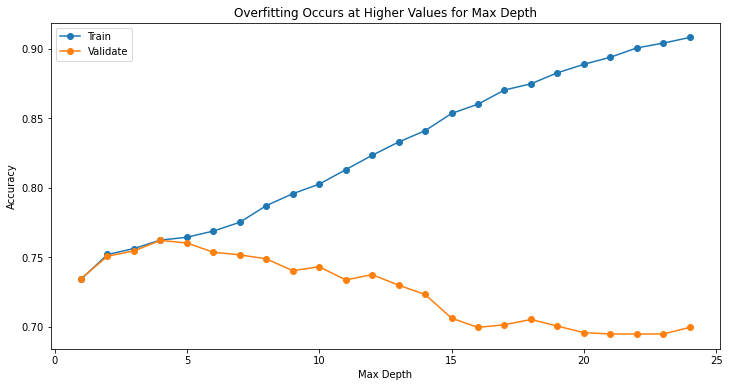

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

#### It appears that a depth of 3-5 would be the best to ensure closer performance on test/validate

### Re-run decision tree with depth of 4

In [37]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=123)
# model.fit(X, y)
tree2.fit(X_train, y_train)
y_pred = tree2.predict(X_train)
actual = y_train

In [38]:
y_pred_proba = tree2.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.44498382, 0.55501618],
       [0.44498382, 0.55501618],
       [0.9889258 , 0.0110742 ],
       [0.92622951, 0.07377049],
       [0.55172414, 0.44827586]])

In [39]:
confusion_matrix(actual, y_pred)

array([[3062,  551],
       [ 619,  690]])

In [40]:
# Classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 4 depth")
pd.DataFrame(report)

Tree of 4 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.831839,0.556003,0.762292,0.693921,0.758481
recall,0.847495,0.527120,0.762292,0.687308,0.762292
f1-score,0.839594,0.541176,0.762292,0.690385,0.760230
support,3613.000000,1309.000000,0.762292,4922.000000,4922.000000


In [41]:
#Calculating TP, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(3062, 551, 619, 690)

In [42]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7622917513206013 

True Positive Rate/Sensitivity/Recall/Power: 0.5271199388846448 

False Positive Rate/False Alarm Ratio/Fall-out: 0.15250484362026018 

True Negative Rate/Specificity/Selectivity: 0.8474951563797398 

False Negative Rate/Miss Rate: 0.47288006111535524 

Precision/PPV: 0.5560032232070911 

F1 Score: 0.5411764705882353 

Support (0): 3613 

Support (1): 1309


#### Running against validate data

In [43]:
y_pred_validate = tree2.predict(X_validate)

In [44]:
#Running on validate
TN, FP, FN, TP = confusion_matrix(y_validate, y_pred_validate).ravel()
TN, FP, FN, TP

(663, 112, 139, 141)

In [45]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.762085308056872 

True Positive Rate/Sensitivity/Recall/Power: 0.5035714285714286 

False Positive Rate/False Alarm Ratio/Fall-out: 0.14451612903225808 

True Negative Rate/Specificity/Selectivity: 0.8554838709677419 

False Negative Rate/Miss Rate: 0.49642857142857144 

Precision/PPV: 0.5573122529644269 

F1 Score: 0.5290806754221389 

Support (0): 775 

Support (1): 280


#### I will use decision tree model with depth of 3, it has a slightly lower accuracy than four, and a small difference in accuracy between training and validate data. It also has a higher recall rate (0.61) than tree model with depth of 4.

## Random Forest Modeling

In [46]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [47]:
#fit the model, max depth 3, min sample leaf 3
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [48]:
# Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

[0.0313264  0.03418535 0.1775129  0.43672083 0.10585512 0.2143994 ]


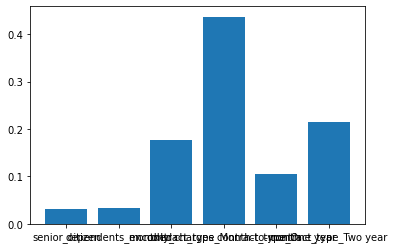

In [49]:
#Visualize feature importance
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

In [50]:
#interpret feature weight
X_train.head()

,senior_citizen,dependents_encoded,monthly_charges,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,0,0,95.70,1,0,0
1,0,0,70.20,1,0,0
2,0,1,20.35,0,0,1
3,0,1,109.00,0,0,1
4,0,1,96.95,1,0,0


In [51]:
#Make predictions
y_pred = rf.predict(X_train)

In [52]:
#Estimate Probability
y_pred_proba = rf.predict_proba(X_train)

### Evaluate model performance on training data

In [53]:
#Evaluate model performance
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.75


In [54]:
rf.score(X_train, y_train)

0.7513206013815522

In [55]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[3447  166]
 [1058  251]]


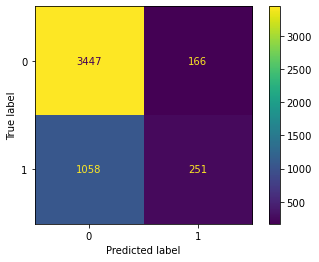

In [56]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [57]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      3613
           1       0.60      0.19      0.29      1309

    accuracy                           0.75      4922
   macro avg       0.68      0.57      0.57      4922
weighted avg       0.72      0.75      0.70      4922



In [58]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(251, 3447, 166, 1058, 4922)

In [59]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7513206013815522
True Positive Rate: 0.1917494270435447
False Positive Rate: 0.045945197896484914
True Negative Rate: 0.9540548021035151
False Negative Rate: 0.8082505729564553
Precision: 0.6019184652278178
Recall: 0.1917494270435447
F1 Score: 0.290845886442642
Support (0): 1309
Support (1): 3613


### Comparing in-sample to out of sample performance (evaluate on validate data)

In [60]:
rf.score(X_validate, y_validate)

0.7459715639810427

In [61]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.75


In [62]:
y_pred_validate = tree2.predict(X_validate)

In [63]:
TN, FP, FN, TP = confusion_matrix(y_validate,y_pred_validate).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(141, 663, 112, 139, 1055)

In [64]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.762085308056872
True Positive Rate: 0.5035714285714286
False Positive Rate: 0.14451612903225808
True Negative Rate: 0.8554838709677419
False Negative Rate: 0.49642857142857144
Precision: 0.5573122529644269
Recall: 0.5035714285714286
F1 Score: 0.5290806754221389
Support (0): 280
Support (1): 775


### Comparing accuracy of different depths

In [65]:
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                     0       1  accuracy    macro avg  weighted avg
precision     0.734051     0.0  0.734051     0.367026      0.538831
recall        1.000000     0.0  0.734051     0.500000      0.734051
f1-score      0.846632     0.0  0.734051     0.423316      0.621471
support    3613.000000  1309.0  0.734051  4922.000000   4922.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.765150     0.601918  0.751321     0.683534      0.721739
recall        0.954055     0.191749  0.751321     0.572902      0.751321
f1-score      0.849224     0.290846  0.751321     0.570035      0.700724
support    3613.000000  1309.000000  0.751321  4922.000000   4922.000000

Tree with max depth of 4
                     0            1  accuracy    macro avg  weighted avg
precision     0.828032     0.553630  0.760463     0.690831      0.755055
recall        0.850263     0.512605  0.760463     0.681434      0.760463

In [66]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.734051,0.734597,-0.000546
1,3,0.751321,0.745972,0.005349
2,4,0.760463,0.761137,-0.000674
3,5,0.763308,0.765877,-0.002569
4,6,0.768793,0.763981,0.004812
5,7,0.779764,0.760190,0.019575
6,8,0.787891,0.749763,0.038128
7,9,0.804551,0.741232,0.063319
8,10,0.822227,0.735545,0.086682
9,11,0.840512,0.722275,0.118237


### Looking at increasing min samples of leaf while decreasing max depth

In [67]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.867330,0.723223,0.144108
1,3,17,0.844982,0.726066,0.118915
2,4,16,0.833198,0.730806,0.102392
3,5,15,0.821414,0.736493,0.084921
4,6,14,0.817148,0.740284,0.076863
5,7,13,0.810646,0.739336,0.071310
6,8,12,0.806176,0.741232,0.064944
7,9,11,0.799878,0.744076,0.055802
8,10,10,0.793783,0.753555,0.040229
9,11,9,0.784844,0.748815,0.036028


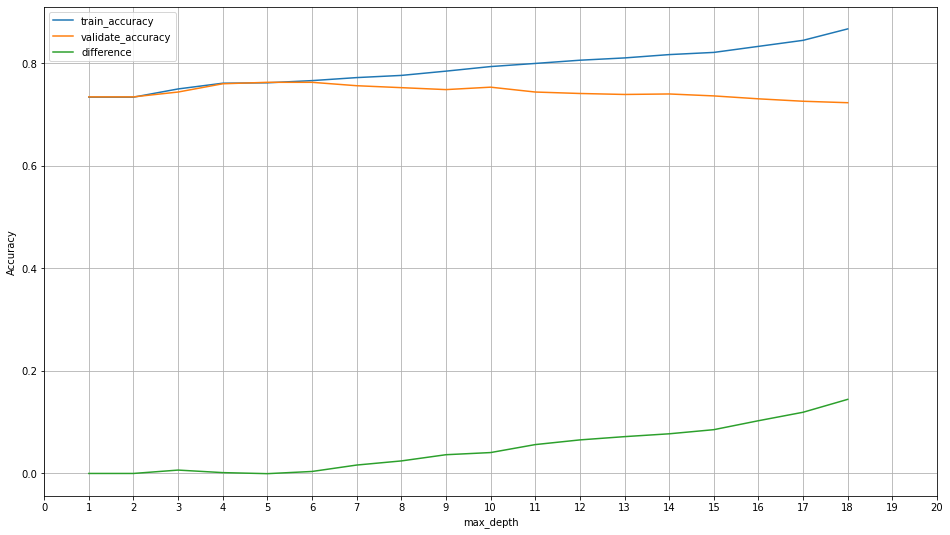

In [68]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### increase both min_samples_per_leaf and max_depth

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
df[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

### fixed depth and increasing min_samples_leaf

In [ ]:
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()

### Going to rerun  random forest modeling with max depth of 5, min samples leaf of 5

In [69]:
rf5 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [70]:
#fit the model, max depth 5, min sample leaf 5
rf5.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=123)

In [71]:
# Evaluate importance, or weight, of each feature.
print(rf5.feature_importances_)

[0.03284262 0.03637999 0.27725552 0.37322784 0.08984355 0.19045047]


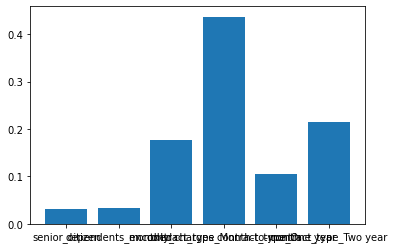

In [72]:
#Visualize feature importance
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

In [73]:
#Make predictions
y_pred = rf5.predict(X_train)

In [74]:
#Estimate Probability
y_pred_proba = rf5.predict_proba(X_train)

### Evaluate performance of rf model (5,5) on training data

In [75]:
#Evaluate model performance
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf5.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.76


In [76]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[3068  545]
 [ 617  692]]


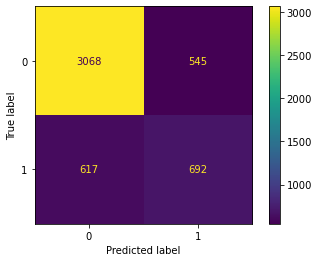

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf5.classes_)

disp.plot()
plt.show()

In [78]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3613
           1       0.56      0.53      0.54      1309

    accuracy                           0.76      4922
   macro avg       0.70      0.69      0.69      4922
weighted avg       0.76      0.76      0.76      4922



In [79]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(692, 3068, 545, 617, 4922)

In [80]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7639171068671272
True Positive Rate: 0.5286478227654698
False Positive Rate: 0.15084417381677276
True Negative Rate: 0.8491558261832273
False Negative Rate: 0.47135217723453016
Precision: 0.5594179466451091
Recall: 0.5286478227654698
F1 Score: 0.5435978004713276
Support (0): 1309
Support (1): 3613


#### Performance of RF model (5,5) on validate data

In [81]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf5.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.76


In [82]:
y_pred_validate = tree2.predict(X_validate)

In [83]:
TN, FP, FN, TP = confusion_matrix(y_validate,y_pred_validate).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(141, 663, 112, 139, 1055)

In [84]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.762085308056872
True Positive Rate: 0.5035714285714286
False Positive Rate: 0.14451612903225808
True Negative Rate: 0.8554838709677419
False Negative Rate: 0.49642857142857144
Precision: 0.5573122529644269
Recall: 0.5035714285714286
F1 Score: 0.5290806754221389
Support (0): 280
Support (1): 775


### Conclusion for RF modeling: our best model is 76 percent accurate on training and validation data, about the same as decision tree. Recall (0.52) and precision (0.52)

## K Nearest Neighbor modeling

In [85]:
#Starting with basic model, 5 neighbors
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [86]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
#Making predictions
y_pred = knn.predict(X_train)

In [88]:
#Estimating probability
y_pred_proba = knn.predict_proba(X_train)

In [89]:
#Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [90]:
#Confusion Matrix
print(confusion_matrix(y_train, y_pred))

[[3274  339]
 [ 547  762]]


In [91]:
#Classification Report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3613
           1       0.69      0.58      0.63      1309

    accuracy                           0.82      4922
   macro avg       0.77      0.74      0.76      4922
weighted avg       0.81      0.82      0.81      4922



In [92]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [93]:
ALL = TP + TN + FP + FN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8199918732222674
True Positive Rate: 0.5821237585943468
False Positive Rate: 0.09382784389703847
True Negative Rate: 0.9061721561029615
False Negative Rate: 0.41787624140565316
Precision: 0.6920980926430518
Recall: 0.5821237585943468
F1 Score: 0.6323651452282157
Support (0): 1309
Support (1): 3613


#### Performance on Validate

In [94]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.72


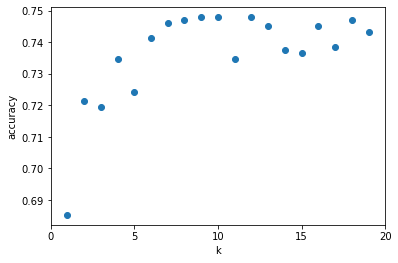

In [95]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [ ]:
# iteration to look at different model accuracies:
model_set = []
model_accuracies = {}
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    model_set.append(clf)
    model_accuracies[f'{i}_neighbors'] = {
        'train_score': round(clf.score(X_train, y_train), 2),
        'validate_score': round(clf.score(X_validate, y_validate), 2)}

In [ ]:
model_accuracies

In [ ]:
#another iteration to look at best k score
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

### Attempting to look further into metrics of k=14

In [96]:
#Running knn on 14
knn14 = KNeighborsClassifier(n_neighbors=14, weights='uniform')
#fitting the model
knn14.fit(X_train, y_train)
#Making predictions
y_pred = knn14.predict(X_train)
#Estimating probability
y_pred_proba = knn14.predict_proba(X_train)
#Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn14.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [97]:
#Confusion Matrix
print(confusion_matrix(y_train, y_pred))

[[3328  285]
 [ 773  536]]


In [98]:
#Classification Report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3613
           1       0.65      0.41      0.50      1309

    accuracy                           0.79      4922
   macro avg       0.73      0.67      0.68      4922
weighted avg       0.77      0.79      0.77      4922



In [99]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[3328  285]
 [ 773  536]]


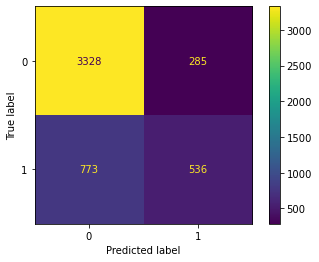

In [100]:
#Plot confusion matrix
plot_confusion_matrix(knn14, X_train, y_train)

In [101]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel() # Why is this line of code failing?

In [102]:
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(536, 3328, 285, 773, 4922)

In [103]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7850467289719626
True Positive Rate: 0.4094728800611154
False Positive Rate: 0.07888181566565182
True Negative Rate: 0.9211181843343482
False Negative Rate: 0.5905271199388846
Precision: 0.6528623629719854
Recall: 0.4094728800611154
F1 Score: 0.5032863849765259
Support (0): 1309
Support (1): 3613


In [104]:
print('Accuracy of KNN (14) classifier on validate set: {:.2f}'
     .format(knn14.score(X_validate, y_validate)))

Accuracy of KNN (14) classifier on validate set: 0.75


In [105]:
y_pred_validate = knn14.predict(X_validate)

In [106]:
TN, FP, FN, TP = confusion_matrix(y_validate,y_pred_validate).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(90, 696, 79, 190, 1055)

In [107]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7450236966824645
True Positive Rate: 0.32142857142857145
False Positive Rate: 0.10193548387096774
True Negative Rate: 0.8980645161290323
False Negative Rate: 0.6785714285714286
Precision: 0.5325443786982249
Recall: 0.32142857142857145
F1 Score: 0.400890868596882
Support (0): 280
Support (1): 775


### Conclusion for KNN: a KNN model using 14 nearest neighbors produces an accuracy of .79 percent accuracy on training data, but only 0.75 accuracy on validate data. Additionally, this model produces a large (0.59) portion of False Negatives.

## Regression Modeling

In [108]:
# Make the model, using defaults but lbfgs solver (could be default)
logit = LogisticRegression(solver='lbfgs',random_state=123)

In [109]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [110]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [111]:
# look at predicted probabilites for first 10 observations
logit.predict_proba(X_train)[:10]

array([[0.44786018, 0.55213982],
       [0.55722055, 0.44277945],
       [0.98975224, 0.01024776],
       [0.9545009 , 0.0454991 ],
       [0.53468043, 0.46531957],
       [0.9336129 , 0.0663871 ],
       [0.60905377, 0.39094623],
       [0.54315497, 0.45684503],
       [0.59526296, 0.40473704],
       [0.57140588, 0.42859412]])

In [112]:
# classification report for training data
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      3613
           1       0.54      0.39      0.45      1309

    accuracy                           0.75      4922
   macro avg       0.67      0.63      0.64      4922
weighted avg       0.73      0.75      0.73      4922



In [113]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [114]:
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(504, 3178, 435, 805, 4922)

In [115]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7480698902885006
True Positive Rate: 0.3850267379679144
False Positive Rate: 0.12039856075283698
True Negative Rate: 0.879601439247163
False Negative Rate: 0.6149732620320856
Precision: 0.536741214057508
Recall: 0.3850267379679144
F1 Score: 0.4483985765124555
Support (0): 1309
Support (1): 3613


In [116]:
# look at model 1 coefficents
 
print('Coefficient: \n', logit.coef_[0])

Coefficient: 
 [ 0.31274309 -0.3697949   0.0172239   1.00025753 -0.76681384 -2.11184164]


In [117]:
# Make a dataframe of model 1 coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
log_coeffs

,coeffs
contract_type_Two year,-2.111842
contract_type_One year,-0.766814
dependents_encoded,-0.369795
monthly_charges,0.017224
senior_citizen,0.312743
contract_type_Month-to-month,1.000258


#### Examining model 1 performance on validate data

In [118]:
print('Logit model 1, default features, solver lbfgs')
print(classification_report(y_validate, logit.predict(X_validate)))

Logit model 1, default features, solver lbfgs
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       775
           1       0.54      0.36      0.43       280

    accuracy                           0.75      1055
   macro avg       0.67      0.62      0.63      1055
weighted avg       0.73      0.75      0.73      1055



#### Making a second iteration of regression, but balancing class weights

In [119]:
#Making a second iteration of regression, but balancing class weights
logit2 = LogisticRegression(solver='lbfgs', random_state=123, class_weight='balanced')

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

accuracy = logit2.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.71


In [120]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
ALL = TN + FP + FN + TP

In [121]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7112962210483543
True Positive Rate: 0.8166539343009931
False Positive Rate: 0.32687517298643787
True Negative Rate: 0.6731248270135621
False Negative Rate: 0.18334606569900688
Precision: 0.4751111111111111
Recall: 0.8166539343009931
F1 Score: 0.6007305422871594
Support (0): 1309
Support (1): 3613


#### Examining model 2 performance on validate data

In [122]:
print('Logit model 2, balancing class weights, solver lbfgs')
print(classification_report(y_validate, logit2.predict(X_validate)))

Logit model 2, balancing class weights, solver lbfgs
              precision    recall  f1-score   support

           0       0.90      0.65      0.76       775
           1       0.45      0.80      0.58       280

    accuracy                           0.69      1055
   macro avg       0.68      0.73      0.67      1055
weighted avg       0.78      0.69      0.71      1055



### Conclusion for regession:  The original model performed equally well (accuracy) on both train and validate data (0.75). However, recall is very low (0.38) compared to other models with precision being 0.54

## Overall conclusion on modeling: Based on results of the modeling section, I am moving forward with my best model. My best model is a decision tree with a depth of 3. I chose this model because it performed almost equally well on testing and training data (0.756 on train, 0.75 on validate). It also produced the best combination of Recall and precision with both train and validate, with small differences between the two. 

## Predicting customers who will not churn but churn (a false negative) can be minimized by selecting a model with higher Recall. The decision tree (depth of 3) produced a model with 0.61 recall on both the training and validation data.

In [ ]:
def get_tree_test(X_train,X_test,y_train,y_test):
    '''get decision tree accuracy on train and test data'''
    #Testing on Decision Tree (depth of 3):
    tree = DecisionTreeClassifier(max_depth=3, random_state=123)
    # fitting the model(X, y)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_train)
    print(f"Accuracy of Decision Tree on train data is {tree.score(X_train, y_train)}")
    print(f"Accuracy of Decision Tree on test data is {tree.score(X_test, y_test)}")

In [ ]:
w.get_tree_test(X_train,X_test,y_train,y_test)

In [ ]:
X_test.head()

In [ ]:
y_test.head()

## Making CSV with customer ID

In [48]:
# acquiring telco data from codeup database trying to keep customer id for test set
df = w.get_telco_data()

In [49]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [50]:
# Drop duplicate columns
df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'], inplace=True)
       
# Drop null values stored as whitespace    
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']
    
# Convert to correct datatype
df['total_charges'] = df.total_charges.astype(float)
    
# Convert binary categorical variables to numeric
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
# Get dummies for non-binary categorical variables
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=False)
    
# Concatenate dummy dataframe to original 
df = pd.concat([df, dummy_df], axis=1)
    
# Drop original churn variable (we encoded)
df.drop(columns=['churn'], inplace=True)
    
# Rename encoded churn
df.rename(columns = {'churn_encoded':'churn'}, inplace=True)

In [51]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,1,0,0,0,0,1


In [52]:
#Split data and set target variable
target = 'churn'
train, validate, test = w.train_validate_test_split(df, target)

In [53]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,6212-ATMLK,Female,0,No,No,50,Yes,Yes,No,No,...,1,0,0,0,1,0,0,0,1,0
1756,2568-BRGYX,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
4669,6585-WCEWR,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,...,0,0,1,0,0,1,0,0,1,0
2379,3407-JMJQQ,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,...,0,0,1,0,1,0,1,0,0,0
4118,5827-MWCZK,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,...,1,0,0,0,1,0,0,1,0,0


In [54]:
def model_prep_test(train,validate,test):
    '''
    This function prepares train, validate, test for modeling by dropping columns not necessary
    or compatible with modeling algorithms.
    '''
    # drop unused columns 
    keep_cols = ['customer_id',
                 'senior_citizen',
                 'dependents_encoded',
                 'monthly_charges',
                 'contract_type_Month-to-month',
                 'contract_type_One year',
                 'contract_type_Two year',
                 'churn']

    train = train[keep_cols]
    validate = validate[keep_cols]
    test = test[keep_cols]
    
    # Split data into predicting variables (X) and target variable (y) and reset the index for each dataframe
    X_train = train.drop(columns='churn').reset_index(drop=True)
    y_train = train[['churn']].reset_index(drop=True)

    X_validate = validate.drop(columns='churn').reset_index(drop=True)
    y_validate = validate[['churn']].reset_index(drop=True)

    X_test = test.drop(columns='churn').reset_index(drop=True)
    y_test = test[['churn']].reset_index(drop=True)
    
    #rename encoded columns
    
    train.rename(columns={'dependents_encoded': 'has_dependents'})
    validate.rename(columns={'dependents_encoded': 'has_dependents'})
    test.rename(columns={'dependents_encoded': 'has_dependents'})
    
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [55]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model_prep_test(train,validate,test)

In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   1055 non-null   object 
 1   senior_citizen                1055 non-null   int64  
 2   dependents_encoded            1055 non-null   int64  
 3   monthly_charges               1055 non-null   float64
 4   contract_type_Month-to-month  1055 non-null   uint8  
 5   contract_type_One year        1055 non-null   uint8  
 6   contract_type_Two year        1055 non-null   uint8  
dtypes: float64(1), int64(2), object(1), uint8(3)
memory usage: 36.2+ KB


In [57]:
#Splitting customer ID into 
X_test['customer_id'] = X_test.customer_id.str.split('-').str[0]

In [58]:
X_test.head()

,customer_id,senior_citizen,dependents_encoded,monthly_charges,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,0733,0,0,55.65,1,0,0
1,7779,1,0,75.15,0,0,1
2,9548,0,0,81.05,0,0,1
3,7245,0,0,111.50,0,1,0
4,9688,0,0,88.15,1,0,0


In [59]:
X_test_cid = X_test.customer_id

In [60]:
X_test_cid.head()

0    0733
1    7779
2    9548
3    7245
4    9688
Name: customer_id, dtype: object

In [61]:
X_test = X_test.drop(columns='customer_id')

In [62]:
X_train = X_train.drop(columns='customer_id')

In [63]:
X_test

,senior_citizen,dependents_encoded,monthly_charges,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,0,0,55.65,1,0,0
1,1,0,75.15,0,0,1
2,0,0,81.05,0,0,1
3,0,0,111.50,0,1,0
4,0,0,88.15,1,0,0
...,...,...,...,...,...,...
1050,0,0,80.95,1,0,0
1051,1,0,78.45,0,0,1
1052,0,0,50.20,1,0,0
1053,0,0,80.70,1,0,0


In [64]:
w.get_tree_test(X_train,X_test,y_train,y_test)

Accuracy of Decision Tree on train data is 0.7561966680211296
Accuracy of Decision Tree on test data is 0.7507109004739336


In [65]:
tree = DecisionTreeClassifier(max_depth=3, random_state=123)
# model.fit(X, y)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [66]:
y_pred_proba = tree.predict_proba(X_test)
y_pred_proba[0:5]

array([[0.65939394, 0.34060606],
       [0.98540146, 0.01459854],
       [0.98540146, 0.01459854],
       [0.73504274, 0.26495726],
       [0.46359385, 0.53640615]])

In [67]:
#get y_pred from x test
y_pred = tree.predict(X_test)

In [68]:
#Convert to dataframe
X_test_cid = pd.DataFrame(X_test_cid)

In [69]:
#Convert to dataframe
y_pred_proba= pd.DataFrame(y_pred_proba)

In [70]:
#convert to dataframe
y_pred= pd.DataFrame(y_pred)

In [71]:
X_test_cid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1055 non-null   object
dtypes: object(1)
memory usage: 8.4+ KB


In [72]:
predictions = pd.concat([X_test_cid, y_pred_proba, y_pred], axis=1)

In [73]:
predictions

,customer_id,0,1,0
0,0733,0.659394,0.340606,0
1,7779,0.985401,0.014599,0
2,9548,0.985401,0.014599,0
3,7245,0.735043,0.264957,0
4,9688,0.463594,0.536406,1
...,...,...,...,...
1050,9878,0.463594,0.536406,1
1051,8336,0.985401,0.014599,0
1052,1730,0.659394,0.340606,0
1053,0940,0.463594,0.536406,1


In [47]:
predictions.rename(columns = {'0'y_pred_churn':'1',
                              'y_pred':'0'})

AttributeError: 'NoneType' object has no attribute 'rename'

In [74]:
predictions.to_csv("predictions.csv")